
plotting...



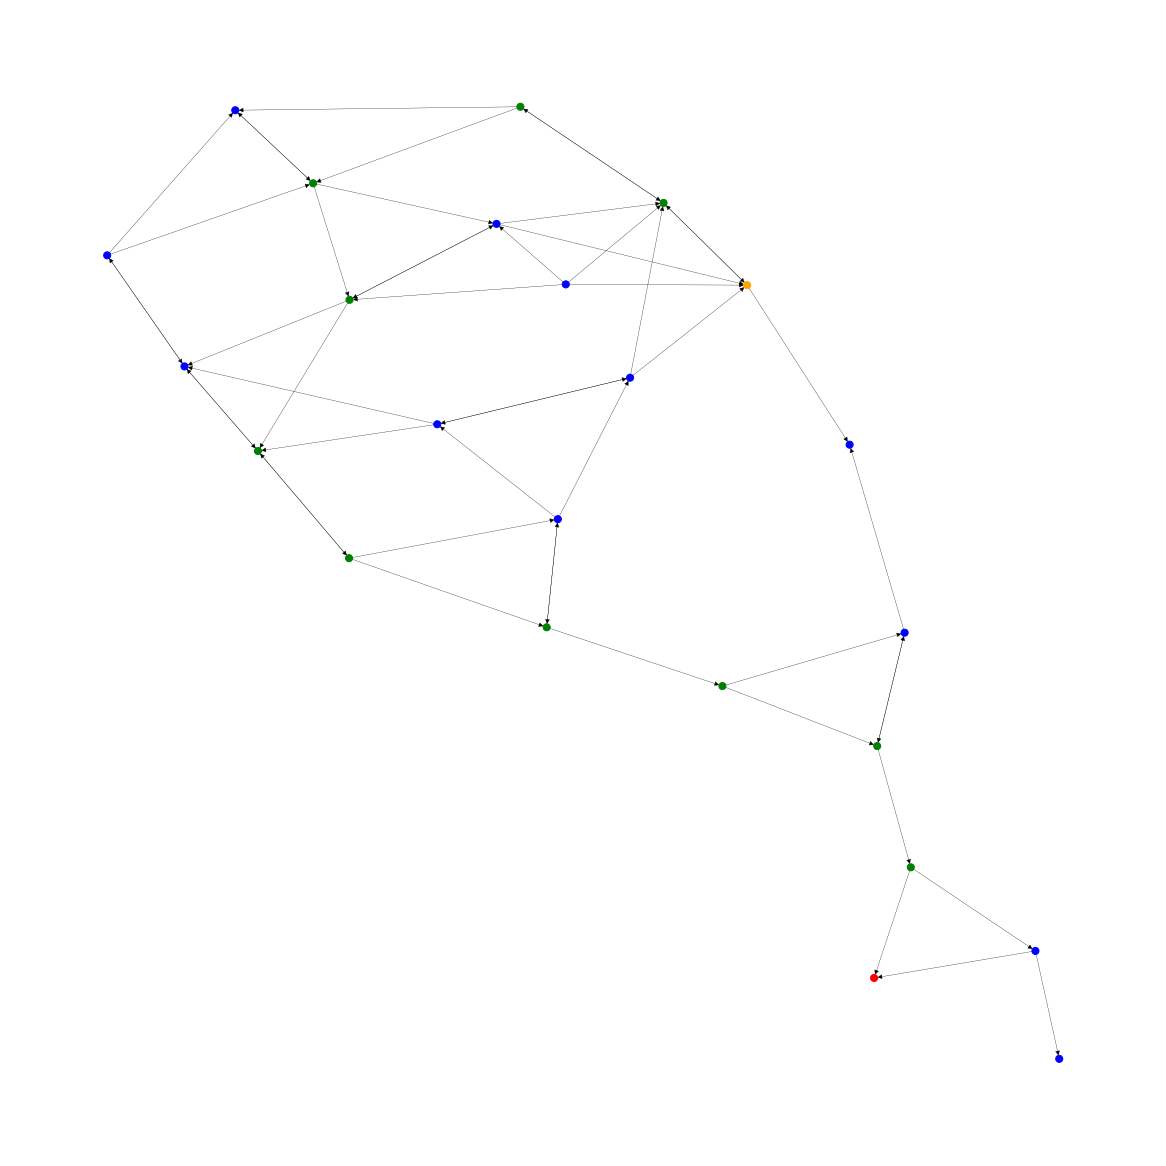

In [ ]:
import random
import numpy as np
import math
import copy
import time
import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
from itertools import repeat
import pickle
from IPython.display import clear_output

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)


#Choose these variables
filenameleveldictionary = "leveldictionary" #For storing levels

size = 5
maxstates = 1000
minstates = 16
maxmovingpieces = 4

minpathlength = 10
lesserlengthpermovingpiece = 0
maxpathlength = 50

maxyellowsquares = 4
maxredsquares = 3
maxyellowcircles = 2
maxredcircles = 3
minwalls = 1
maxwalls = 12


try: 
    alllevels = load_obj(filenameleveldictionary)
    allpuzzlesn = len(alllevels)
except:
    allpuzzlesn = 0
puzzlesfound = 0
attempts = 0

while(True):
    #Variables that should not be changed
    w = size
    h = size
    n = size

    allstates = 0
    allstateslinks = 0
    allstatesdict = 0
    OriginalMatrix = 0
    solutionstates = []
    solutionnodes = []
    spacesmovedin = []
    P = nx.DiGraph()

    timer1counter = 0
    timer2counter = 0
    timer3counter = 0

    triescounter = 0
    levelfound = False

    while levelfound!=True:
        attempts+=1
        triescounter+=1
        print("Puzzles in Dictionary: " + str(allpuzzlesn + puzzlesfound) + 
              "; Puzzles Found This Session: "+ str(puzzlesfound) + 
              "; Current Attempts: " + str(attempts) + "                   ", end="\r")

        nplayers = random.randint(1, maxyellowsquares)
        nsupport = random.randint(0, maxredsquares)
        nplayers2 = random.randint(0, maxyellowcircles)
        nsupport2 = random.randint(0, maxredcircles)

        movingpieces = random.randint(1, maxmovingpieces)
        newminpathlength = minpathlength
        newminpathlength -= movingpieces*lesserlengthpermovingpiece

        if nplayers>movingpieces: nplayers = movingpieces
        movingpieces -= nplayers
        if nsupport>movingpieces: nsupport = movingpieces
        movingpieces -= nsupport
        if nplayers2>movingpieces: nplayers2 = movingpieces
        movingpieces -= nplayers2
        if nsupport2>movingpieces: nsupport2 = movingpieces
        movingpieces -= nsupport2

        nwalls = random.randint(minwalls, maxwalls)

        #### GENERATE RANDOM MATRIX ####

        available = list(range(0, 25))
        Matrix = [[0 for x in range(w)] for y in range(h)]

        exits = []
        for i in range(0,1):
            exits.append(random.choice(available))
            available.remove(exits[-1])
            Matrix[math.floor(exits[-1]/len(Matrix))][exits[-1]%len(Matrix[0])] = 1

        players = []
        for i in range(0,nplayers):
            players.append(random.choice(available))
            available.remove(players[-1])
            players[-1] = [math.floor(players[-1]/len(Matrix)), players[-1]%len(Matrix[0]), 2]

        support = []
        for i in range(0,nsupport):
            support.append(random.choice(available))
            available.remove(support[-1])
            support[-1] = [math.floor(support[-1]/len(Matrix)), support[-1]%len(Matrix[0]), 3]

        if nplayers2 is not 0:
            exits2 = []
            for i in range(0,1):
                exits2.append(random.choice(available))
                available.remove(exits2[-1])
                Matrix[math.floor(exits2[-1]/len(Matrix))][exits2[-1]%len(Matrix[0])] = 5

        players2 = []
        for i in range(0,nplayers2):
            players2.append(random.choice(available))
            available.remove(players2[-1])
            players2[-1] = [math.floor(players2[-1]/len(Matrix)), players2[-1]%len(Matrix[0]), 6]

        support2 = []
        for i in range(0,nsupport2):
            support2.append(random.choice(available))
            available.remove(support2[-1])
            support2[-1] = [math.floor(support2[-1]/len(Matrix)), support2[-1]%len(Matrix[0]), 7]

        walls = []
        for i in range(0,nwalls):
            try:
                walls.append(random.choice(available))
            except:
                boringlevel=True
            available.remove(walls[-1])
            Matrix[math.floor(walls[-1]/len(Matrix))][walls[-1]%len(Matrix[0])] = 4

        OriginalMatrix = copy.deepcopy(Matrix)
        allnew = copy.deepcopy(players) + copy.deepcopy(support) + copy.deepcopy(players2) + copy.deepcopy(support2)

        #Insert predefined Matrix and player/support positions
        #OriginalMatrix = [[0,4,4,0,0], [0,0,0,0,0],[0,0,1,0,0],[0,0,4,0,0],[0,4,0,0,0]]
        #allnew = [[3,1,2],[4,3,2],[3,3,3],[4,2,3]]


        #START SOLVING MATRIX:
        allstates = [copy.deepcopy(allnew)]
        allstatesdict = {str(copy.deepcopy(allstates)): 0}
        allstateslinks = [[]]
        allstateslinksdir = [[]]

        boringlevel = False
        solutions = 0
        solutionnodes = []
        solutionstates = []

        statecounter=0
        statesleft = 1
        while statesleft>0 and statecounter<maxstates:
            statesleft-=1

            for i in range(1,5):
                allnew = copy.deepcopy(allstates[statecounter])
                Matrix = copy.deepcopy(OriginalMatrix)
                for j in allnew:
                    Matrix[j[0]][j[1]] = j[2]
                supportin=0
                playersin=0

                if not (sum([1 for x in allnew if x[2] == 2 or x[2] == 6])==0):

                    #IF UP
                    if i==1:
                        temp = [el[0] for el in allnew]
                        result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                        for ps in result:
                            blockfound = False
                            while allnew[ps][0]>0 and Matrix[allnew[ps][0]-1][allnew[ps][1]] in [0,1,5] and allnew[ps][2]!=0 and not blockfound:
                                if Matrix[allnew[ps][0]-1][allnew[ps][1]]==1:
                                    if allnew[ps][2]==2:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2] == 3:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                    elif allnew[ps][2] == 6:
                                        blockfound = True
                                    elif allnew[ps][2] == 7:
                                        blockfound = True
                                elif Matrix[allnew[ps][0]-1][allnew[ps][1]] == 5:
                                    if allnew[ps][2] == 2:
                                        blockfound = True
                                    elif allnew[ps][2] == 3:
                                        blockfound = True
                                    elif allnew[ps][2]==6:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2] == 7:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                elif allnew[ps][2] == 2:
                                    Matrix[allnew[ps][0]-1][allnew[ps][1]]=2
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 3:
                                    Matrix[allnew[ps][0]-1][allnew[ps][1]]=3
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 6:
                                    Matrix[allnew[ps][0]-1][allnew[ps][1]]=6
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 7:
                                    Matrix[allnew[ps][0]-1][allnew[ps][1]]=7
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                if allnew[ps][2]!=0 and not blockfound:
                                    allnew[ps][0] -= 1
                                    spacesmovedin.append((allnew[ps][0], allnew[ps][1]))

                    #IF DOWN
                    if i==2:
                        temp = [el[0] for el in allnew]
                        result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse=True)]
                        for ps in result:
                            blockfound = False
                            while allnew[ps][0]<len(Matrix)-1 and Matrix[allnew[ps][0]+1][allnew[ps][1]] in [0,1,5] and allnew[ps][2]!=0 and not blockfound:
                                if Matrix[allnew[ps][0]+1][allnew[ps][1]]==1:
                                    if allnew[ps][2]==2:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2] == 3:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                    elif allnew[ps][2] == 6:
                                        blockfound = True
                                    elif allnew[ps][2] == 7:
                                        blockfound = True
                                elif Matrix[allnew[ps][0]+1][allnew[ps][1]]==5:
                                    if allnew[ps][2] == 2:
                                        blockfound = True
                                    elif allnew[ps][2] == 3:
                                        blockfound = True
                                    elif allnew[ps][2]==6:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2] == 7:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                elif allnew[ps][2] == 2:
                                    Matrix[allnew[ps][0]+1][allnew[ps][1]]=2
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 3:
                                    Matrix[allnew[ps][0]+1][allnew[ps][1]]=3
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 6:
                                    Matrix[allnew[ps][0]+1][allnew[ps][1]]=6
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 7:
                                    Matrix[allnew[ps][0]+1][allnew[ps][1]]=7
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                if allnew[ps][2]!=0 and not blockfound:
                                    allnew[ps][0] += 1
                                    spacesmovedin.append((allnew[ps][0], allnew[ps][1]))

                    #IF LEFT
                    if i==3:
                        temp = [el[1] for el in allnew]
                        result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                        for ps in result:
                            blockfound = False
                            while allnew[ps][1]>0 and Matrix[allnew[ps][0]][allnew[ps][1]-1] in [0,1,5] and allnew[ps][2]!=0 and not blockfound:
                                if Matrix[allnew[ps][0]][allnew[ps][1]-1]==1:
                                    if allnew[ps][2]==2:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2]==3:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                    elif allnew[ps][2]==6:
                                        blockfound = True
                                    elif allnew[ps][2]==7:
                                        blockfound = True
                                elif Matrix[allnew[ps][0]][allnew[ps][1]-1]==5:
                                    if allnew[ps][2]==2:
                                        blockfound = True
                                    elif allnew[ps][2]==3:
                                        blockfound = True
                                    elif allnew[ps][2]==6:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2]==7:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                elif allnew[ps][2] == 2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]-1]=2
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 3:
                                    Matrix[allnew[ps][0]][allnew[ps][1]-1]=3
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 6:
                                    Matrix[allnew[ps][0]][allnew[ps][1]-1]=6
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 7:
                                    Matrix[allnew[ps][0]][allnew[ps][1]-1]=7
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                if allnew[ps][2]!=0 and not blockfound:
                                    allnew[ps][1] -= 1
                                    spacesmovedin.append((allnew[ps][0], allnew[ps][1]))

                    #IF RIGHT
                    if i==4:
                        temp = [el[1] for el in allnew]
                        result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse = True)]
                        for ps in result:
                            blockfound = False
                            while allnew[ps][1]<len(Matrix[0])-1 and Matrix[allnew[ps][0]][allnew[ps][1]+1] in [0,1,5] and allnew[ps][2]!=0 and not blockfound:
                                if Matrix[allnew[ps][0]][allnew[ps][1]+1]==1:
                                    if allnew[ps][2]==2:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2]==3:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                    elif allnew[ps][2]==6:
                                        blockfound = True
                                    elif allnew[ps][2]==7:
                                        blockfound = True
                                elif Matrix[allnew[ps][0]][allnew[ps][1]+1]==5:
                                    if allnew[ps][2]==2:
                                        blockfound = True
                                    elif allnew[ps][2]==3:
                                        blockfound = True
                                    elif allnew[ps][2]==6:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        playersin+=1
                                        allnew[ps][2] = 0
                                    elif allnew[ps][2]==7:
                                        Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                        allnew[ps][2] = 0
                                        supportin += 1
                                elif allnew[ps][2] == 2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]+1]=2
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 3:
                                    Matrix[allnew[ps][0]][allnew[ps][1]+1]=3
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 6:
                                    Matrix[allnew[ps][0]][allnew[ps][1]+1]=6
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                elif allnew[ps][2] == 7:
                                    Matrix[allnew[ps][0]][allnew[ps][1]+1]=7
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                if allnew[ps][2]!=0 and not blockfound:
                                    allnew[ps][1] += 1
                                    spacesmovedin.append((allnew[ps][0], allnew[ps][1]))

                if not supportin > 0 and str(allnew) not in allstatesdict:
                    if sum([1 for x in allnew if x[2] == 2 or x[2] == 6])==0:
                        solutions += 1
                        solutionstate=allnew
                        solutionstates.append(solutionstate)
                        solutionnode = len(allstatesdict)
                        solutionnodes.append(solutionnode)

                    allstateslinks[statecounter].append(len(allstates))
                    allstateslinksdir[statecounter].append(i)
                    allstates.append(allnew)
                    allstatesdict[str(allnew)] = len(allstatesdict)
                    allstateslinks.append([])
                    allstateslinksdir.append([])
                    statesleft+=1

                elif str(allnew) in allstatesdict:
                    allstateslinks[statecounter].append(allstatesdict[str(allnew)])
                    allstateslinksdir[statecounter].append(i)
            statecounter+=1

        if statecounter > maxstates-2 or statecounter < minstates or solutions == 0:
            boringlevel=True
        
        shortestpaths = []
        puzzlepaths = []
        
        if not boringlevel:
            P = nx.DiGraph()
            P.add_nodes_from(range(len(allstates)))
            for i in range(len(allstateslinks)):
                for j in allstateslinks[i]:
                    P.add_edge(i,j)

            sources = []
            for solutionnode in solutionnodes:
                shortestpath = nx.single_target_shortest_path(P, solutionnode)
                tempsps = []
                for item in shortestpath:
                    tempsps.append(shortestpath[item])
                shortestpaths.append(list(tempsps))
                shortestpath = shortestpath[list(shortestpath)[-1]]

                if(len(shortestpath)<newminpathlength):
                    boringlevel = True
                    break
                if sum([1 for x in allstates[shortestpath[0]] if x[2] == 0]) == 0:
                    sources.append(shortestpath[0])
            
            shortestpaths = [item for sublist in shortestpaths for item in sublist]
            
            spallmoveablepresent = []
            for sps in shortestpaths:
                boring = False
                for nn in range(len(sps)-len(allstates[0])):
                    if not (sum([1 for x in allstates[sps[nn]] if x[2] == 0])==0):
                        boring = True
                if not boring:
                    spallmoveablepresent.append(sps)
            shortestpaths = spallmoveablepresent
            
            shortestpathsCOPY = copy.deepcopy(shortestpaths)
            
            if len(shortestpaths[len(shortestpaths)-1])<newminpathlength:
                    boringlevel = True
            
            #OLD AND UNUSED FOR NOW
            showold = False
            if not boringlevel and showold:
                bestpath = []
                sources = list(set(sources))
                for source in sources:
                    min = [0]*1000
                    for solutionnode in solutionnodes:
                        try:
                            temppath = nx.shortest_path(P, source, solutionnode)
                            if len(temppath)<len(min) and sum([1 for x in allstates[temppath[0]] if x[2] == 0])==0:
                                min = temppath
                        except:
                            pass
                    if len(min)>len(bestpath):
                        bestpath = min
                if len(bestpath)<newminpathlength or len(bestpath)>maxpathlength or bestpath[0] == 0:
                    boringlevel = True
                
            #PUZZLEPATHS    
            if not boringlevel and len(shortestpaths)>0:                    
                
                #Remove shortest paths shorter than the minimum path length
                tempsps = []
                for sps in shortestpaths:
                    if len(sps)>newminpathlength:
                        tempsps.append(sps)

                for item in tempsps:
                    if item not in shortestpathsCOPY:
                        print("\n\nproblem 1\n\n")
                shortestpaths = tempsps


                #remove paths if path from start-node to a solution is longer than one already stored
                if len(shortestpaths)>0:
                    startnodes = []
                    startnodeslens = []
                    pathstostore = []
                    for s in range(len(shortestpaths)):
                        if shortestpaths[s][0] in startnodes:
                            if len(shortestpaths[s])<startnodeslens[startnodes.index(shortestpaths[s][0])]:
                                startnodeslens[startnodes.index(shortestpaths[s][0])] = len(shortestpaths[s])
                                pathstostore[startnodes.index(shortestpaths[s][0])] = s
                        else:
                            startnodes.append(shortestpaths[s][0])
                            startnodeslens.append(len(shortestpaths[s]))
                            pathstostore.append(s)
                    tempsps = []
                    for s in pathstostore:
                        tempsps.append(shortestpaths[s])

                    for item in tempsps:
                        if item not in shortestpathsCOPY:
                            print("\n\nproblem 2\n\n")

                    shortestpaths = tempsps

                #Add path if it's a "puzzlepath"
                if len(shortestpaths)>0:
                    puzzlepaths = []
                    indexes = reversed(list(range(len(shortestpaths))))
                    failednodes = []

                    for i in indexes:
                        path = shortestpaths[i]
                        ispuzzlepath = True

                        #Check if should check if path is puzzlepath
                        for j in path:
                            if j in [item for sublist in puzzlepaths for item in sublist]:
                                ispuzzlepath = False
                            if j in failednodes:
                                ispuzzlepath = False
                        if not ispuzzlepath:
                            break


                        for j in reversed(list(range(0,len(path)-3))):
                            Ptemp = copy.deepcopy(P)
                            Ptemp.remove_nodes_from([path[j+1], path[j+2]])
                            for solutionnode in solutionnodes:
                                if nx.has_path(Ptemp, path[j], solutionnode):
                                    failednodes.append(path[j])
                                    ispuzzlepath=False
                                    break
                            if not ispuzzlepath:
                                break
                        if ispuzzlepath:
                            puzzlepaths.append(path)

                for item in puzzlepaths:
                    if item not in shortestpathsCOPY:
                        print("\n\nproblem 3\n\n")
            
        if not boringlevel and len(puzzlepaths)>0:
            levelfound=True
    
    #Fill in unused areas with walls
    CopyMatrix = copy.deepcopy(OriginalMatrix)
    for j in allstates[0]:
        if j[2]==2 or j[2]==6:
            CopyMatrix[j[0]][j[1]] = 2

    while(sum([1 for sublist in CopyMatrix for item in sublist if item == 2])!=0):
        for i in range(5):
            for j in range(5):
                if CopyMatrix[i][j]==2:
                    CopyMatrix[i][j]=-1
                    if i!=4:
                        if CopyMatrix[i+1][j] not in [1,4,5,-1]:
                            CopyMatrix[i+1][j]=2
                    if i !=0:
                        if CopyMatrix[i-1][j] not in [1,4,5,-1]:
                            CopyMatrix[i-1][j]=2
                    if j != 4:
                        if CopyMatrix[i][j+1] not in [1,4,5,-1]:
                            CopyMatrix[i][j+1]=2
                    if j != 0:
                        if CopyMatrix[i][j-1] not in [1,4,5,-1]:
                            CopyMatrix[i][j-1]=2
    
    for i in range(5):
            for j in range(5):
                if CopyMatrix[i][j] in [0,3,7]:
                    CopyMatrix[i][j] = 4
                if CopyMatrix[i][j] == -1:
                    CopyMatrix[i][j] = 0
    
    movablebeen = list(set([(item[0], item[1]) for sublist in allstates for item in sublist]+spacesmovedin))
    
    for i in range(5):
        for j in range(5):
            if CopyMatrix[i][j] == 0 and not (i,j) in movablebeen:
                CopyMatrix[i][j] = 4
    
    filledMatrix = copy.deepcopy(CopyMatrix)
    
    for path in puzzlepaths:
        CopyMatrix = copy.deepcopy(filledMatrix)
        
        for j in allstates[path[0]]:
            if CopyMatrix[j[0]][j[1]] != 4:
                CopyMatrix[j[0]][j[1]] = j[2]
        
        #Flatten list
        LEVEL = [item for sublist in CopyMatrix for item in sublist]   
        
        #Find shortest solution to puzzle
        directions = []
        for i in range(0,len(path)-1):
            index = allstateslinks[path[i]].index(path[i+1])
            directions.append(allstateslinksdir[path[i]][index])

        #solution = "Solution: "
        #for direction in directions:
        #    if direction==1: solution+= "↑ "
        #    if direction==2: solution+= "↓ "
        #    if direction==3: solution+= "← "
        #    if direction==4: solution+= "→ "

        #Open Allevels dictionary or create an empty dictionary if it's not already there:
        empty = False
        try: 
            alllevels = load_obj(filenameleveldictionary)
        except:
            empty = True
            alllevels = {}
        
        #Rotate level matrix 4 times and see if any rotation already exists
        exists = False
        if not empty:
            templevelmatrix = [LEVEL[i:i + len(CopyMatrix)] for i in range(0, len(LEVEL), len(CopyMatrix))]
            for i in range(4):
                templevel =  str([item for sublist in templevelmatrix for item in sublist])
                if templevel in alllevels:
                    exists = True
                    break
                templevelmatrix = list(map(list, zip(*templevelmatrix)))[::-1]
        
        if not exists:
            #Create ID greater than any ID in the dictionary
            ID = 0
            for item in alllevels:
                if alllevels[item][0]>ID:
                    ID = alllevels[item][0]
            ID+=1

            #if empty or not exists:
            alllevels[str(LEVEL)] = [ID, LEVEL, directions]
            save_obj(alllevels, filenameleveldictionary)
            puzzlesfound += 1
            attempts = 0

            clear_output(wait=True)
            
            
            #plot if needed
            shouldplot = True
            if shouldplot:
                print("\nplotting...\n")
                plt.figure(figsize=(16,16))
                startnodes = []
                endnodes = []
                for p in puzzlepaths:
                    startnodes.append(p[0])
                    endnodes.append(p[len(p)-1])
                node_color = []
                for node in P:
                    if node in endnodes:
                        node_color.append('red')
                    elif node in startnodes: 
                        node_color.append('orange')
                    elif node in [item for sublist in puzzlepaths for item in sublist]:
                        node_color.append('green')
                    else:
                        node_color.append('blue')
                nx.draw_kamada_kawai(P, with_label = False, node_size = 50, node_color=node_color, font_size=0, arrowsize=10,  width=0.3)
                #nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
                plt.show()
    

In [284]:
filename = "puzzles"

empty = False
try: 
    alllevels = load_obj(filename)
except:
    empty = True
    alllevels = {}

exists = False
    
if not empty:
    templevelmatrix = [LEVEL[i:i + n] for i in range(0, len(LEVEL), n)]
    for i in range(4):
        templevel =  str([item for sublist in templevelmatrix for item in sublist])
        if templevel in alllevels:
            exists = True
            break
        temp = list(map(list, zip(*templevelmatrix)))[::-1]

if empty or not exists:
    alllevels[str(LEVEL)] = [len(alllevels), directions, solution]
    save_obj(alllevels, filename)    

In [215]:
filename = "alllevels"

empty = False
try: 
    alllevels = load_obj(filename)
except:
    empty = True
    alllevels = {}

exists = False
    
if not empty:
    templevelmatrix = [LEVEL[i:i + n] for i in range(0, len(LEVEL), n)]
    for i in range(4):
        templevel =  str([item for sublist in templevelmatrix for item in sublist])
        if templevel in alllevels:
            exists = True
            break
        temp = list(map(list, zip(*templevelmatrix)))[::-1]

if empty or not exists:
    alllevels[str(LEVEL)] = [len(alllevels), directions, solution]
    save_obj(alllevels, filename)    

### Difficulty:

Minimum Solution Length

Movable Objects

Has Red Squares

Has Yellow Circles

Has Red Circles

Number of Walls

Diameter of Graph

Can Get Stuck?

Branching Factor

Number of ways to solve (this is of course one in my case)


In [1]:
#### Define number of randomly generated objects ####        

nplayersmm = [2,2] 
nsupportmm = [1,4]
nwallsmm = [1,6]
npexistsmm = [1,1] 

import random
import numpy as np
import math
import copy
import time
import networkx as nx
import matplotlib.pyplot as plt



timer1counter = 0
timer2counter = 0
timer3counter = 0

triescounter=0
levelfound = False
while levelfound==False:
    nplayers = random.randint(nplayersmm[0], nplayersmm[1])
    nexits = random.randint(npexistsmm[0], npexistsmm[1])
    nsupport = random.randint(nsupportmm[0], nsupportmm[1])
    nwalls = random.randint(nwallsmm[0], nwallsmm[1])

    #### GENERATE RANDOM MATRIX ####
    
    print("Number of attempts: " + str(triescounter), end="\r")
    triescounter+=1

    # Generate puzzle board
    w, h = 5, 5; #board size

    available = list(range(0, w*h))
    Matrix = [[0 for x in range(w)] for y in range(h)] 
    
    
    #Choose random objects and place them on board
    exits = []
    for i in range(0,1):
        exits.append(random.choice(available))
        available.remove(exits[-1])
        Matrix[math.floor(exits[-1]/len(Matrix))][exits[-1]%len(Matrix[0])] = 1
        #exits[-1] = [math.floor(exits[-1]/5), exits[-1]%5, 3]
    
    players = []
    for i in range(0,2):
        players.append(random.choice(available))
        available.remove(players[-1])
        #Matrix[math.floor(players[-1]/5)][players[-1]%5] = 2
        players[-1] = [math.floor(players[-1]/len(Matrix)), players[-1]%len(Matrix[0]), 2]

    #for i in(1,random.choice(range(1,math.floor((len(Matrix)*len(Matrix[0]))/2) ))):
    #    j = random.choice(range(0,1))
    #    if j == 0:
    support = []
    for i in range(0,random.choice(nsupportmm)):
        support.append(random.choice(available))
        available.remove(support[-1])
        #Matrix[math.floor(support[-1]/5)][support[-1]%5] = 3
        support[-1] = [math.floor(support[-1]/len(Matrix)), support[-1]%len(Matrix[0]), 3]

        #if j == 1:
    walls = []
    for i in range(0,random.choice(nwallsmm)):
        walls.append(random.choice(available))
        available.remove(walls[-1])
        Matrix[math.floor(walls[-1]/len(Matrix))][walls[-1]%len(Matrix[0])] = 4
        #walls[-1] = [math.floor(walls[-1]/5), walls[-1]%5, 3]


    #print("Matrix to Solve:")

    OriginalMatrix = copy.deepcopy(Matrix)
    allnew = copy.deepcopy(players) + copy.deepcopy(support)
    
    #Insert predefined Matrix and player/support positions
    #OriginalMatrix = [[0,4,4,0,0], [0,0,0,0,0],[0,0,1,0,0],[0,0,4,0,0],[0,4,0,0,0]]
    #allnew = [[3,1,2],[4,3,2],[3,3,3],[4,2,3]]

    
    allstates = [copy.deepcopy(allnew)]
    allstatesdict = {str(copy.deepcopy(allstates)): 0}
    allstateslinks = [[]]


    boringlevel = False
    solutions = 0
    newstates = 0
    prevstates = 0
    ratio=[]
    
    
    #P = nx.DiGraph()
    #P.add_node(0)

    
    statecounter=0
    statesleft = 1
    while statesleft>0 and boringlevel==False and statecounter<1000:
        statesleft-=1
                
        for i in range(1,5):

            allnew = copy.deepcopy(allstates[statecounter])
            Matrix = copy.deepcopy(OriginalMatrix)
            for j in allnew:
                Matrix[j[0]][j[1]] = j[2]
            supportin=0
            playersin=0

            if not (allnew[0][2]==0 and allnew[1][2]==0):
                start = time.time()
                if i==1:
                    temp = [el[0] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                    for ps in result:
                        while allnew[ps][0]>0 and Matrix[allnew[ps][0]-1][allnew[ps][1]] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]-1][allnew[ps][1]]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else: 
                                    #Matrix[allnew[ps][0]-1][allnew[ps][1]]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]-1][allnew[ps][1]]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3: 
                                Matrix[allnew[ps][0]-1][allnew[ps][1]]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][0] -= 1

                #IF DOWN

                if i==2:
                    temp = [el[0] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse=True)]
                    for ps in result:
                        while allnew[ps][0]<len(Matrix)-1 and Matrix[allnew[ps][0]+1][allnew[ps][1]] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]+1][allnew[ps][1]]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else: 
                                    #Matrix[allnew[ps][0]+1][allnew[ps][1]]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]+1][allnew[ps][1]]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3:  
                                Matrix[allnew[ps][0]+1][allnew[ps][1]]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][0] += 1

                #IF LEFT

                if i==3:
                    temp = [el[1] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                    #print(result)
                    for ps in result:
                        while allnew[ps][1]>0 and Matrix[allnew[ps][0]][allnew[ps][1]-1] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]][allnew[ps][1]-1]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else: 
                                    #Matrix[allnew[ps][0]][allnew[ps][1]-1]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]][allnew[ps][1]-1]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3: 
                                Matrix[allnew[ps][0]][allnew[ps][1]-1]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][1] -= 1

                #IF RIGHT

                if i==4:

                    temp = [el[1] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse = True)]
                    for ps in result:
                        while allnew[ps][1]<len(Matrix[0])-1 and Matrix[allnew[ps][0]][allnew[ps][1]+1] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]][allnew[ps][1]+1]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else: 
                                    #Matrix[allnew[ps][0]][allnew[ps][1]+1]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]][allnew[ps][1]+1]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3: 
                                Matrix[allnew[ps][0]][allnew[ps][1]+1]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][1] += 1
                
                end = time.time()
                timer1counter += end - start
                
                start = time.time()
                
                #if (newstates+0.01)/(prevstates+0.01)<2/math.sqrt(len(allnew)) and statecounter>20: 
                #    boringlevel = True
                ratio.append((newstates+0.01)/(prevstates+0.01))    
                
                if allnew[0][2]+allnew[1][2] <4 and statecounter<8*math.sqrt(math.sqrt(len(allnew))):
                    boringlevel=True
                if allnew[0][2]+allnew[1][2] <2 and statecounter<16*math.sqrt(math.sqrt(len(allnew))):
                    boringlevel=True
                    
                if allnew[0][2]+allnew[1][2]==0:
                    solutions += 1
                    solutionstate=allnew
                    solutionnode = len(allstatesdict)-1
                    
                if solutions >1:
                    boringlevel = True
                
                
                
                end = time.time()
                timer2counter += end - start
                
                start = time.time()
              
                if not supportin > 0 and str(allnew) not in allstatesdict:
                    
                    #P.add_node(len(allstatesdict))
                    #P.add_edge(statecounter,len(allstatesdict))
                    
                    allstateslinks[statecounter].append(len(allstates))
                    allstates.append(allnew)
                    allstatesdict[str(allnew)] = len(allstatesdict)
                    allstateslinks.append([])
                    statesleft+=1
                    newstates+=1
                    
                elif str(allnew) in allstatesdict:
                    allstateslinks[statecounter].append(allstatesdict[str(allnew)])
                    #P.add_edge(statecounter,allstatesdict[str(allnew)])
                    
                    if not statecounter in allstateslinks[allstatesdict[str(allnew)]]:
                        prevstates+=1
                        
                end = time.time()
                timer3counter += end - start
                
        statecounter+=1
        #if statecounter%1000 ==0:
        #    print("Number of attempts: " + str(triescounter) + " Number of states: " + str(statecounter), end="\r")
        
        #print("Level solver: " + str(timer1counter) + " State Lookup: " + str(timer2counter) + " State Lookup2: " + str(timer3counter), end="\r")
    
    if not boringlevel and solutions==1:
        P= nx.DiGraph()
        P.add_nodes_from(range(len(allstates)))

        for i in range(len(allstateslinks)):
            for j in allstateslinks[i]:
                P.add_edge(i,j)

        #Check for critical states
        shortestpath = nx.shortest_path(P,0,solutionnode)
        shortestpath = nx.single_target_shortest_path(P, solutionnode)
        shortestpath = shortestpath[list(shortestpath)[-1]]
        
        if(len(shortestpath)<15):
            boringlevel = True

        #for i in range(0,len(shortestpath)-3):
        #    Ptemp = P
        #    Ptemp.remove_nodes_from([shortestpath[i]+1, shortestpath[i]+2])

            #if nx.has_path(Ptemp, 0,solutionnode):
            #    boringlevel=True
            #    myass="hot"
        
    
    if not boringlevel and (sum([x[0][2]+x[1][2]==0 for x in allstates]))==1 and statecounter!=1000 and statecounter>200:
        levelfound=True

print("\nFun Level Found! Try it out!")





Number of attempts: 26153
Fun Level Found! Try it out!


In [3]:
if sum([x[0][2]+x[1][2] for x in allstates]) < 2*len(allstates)*2/2:
    boringlevel = True


[allstates[x][0][2]+allstates[x][1][] for x in bestpath]

SyntaxError: invalid syntax (<ipython-input-3-d276d9107821>, line 5)

In [ ]:
if solutions != 0:
    P = nx.DiGraph()
    P.add_nodes_from(range(len(allstates)))

    for i in range(len(allstateslinks)):
        for j in allstateslinks[i]:
            P.add_edge(i,j)
    
    sources = []
    for solutionnode in solutionnodes:
        shortestpath = nx.single_target_shortest_path(P, solutionnode)
        shortestpath = shortestpath[list(shortestpath)[-1]]
        
        sources.append(shortestpath[0])
        
        if(len(shortestpath)<15):
            boringlevel = True
    
    bestpath = []
    for source in sources:
        shortestpath = 99999
        
        for solutionnode in solutionnodes:
            temppath = nx.shortestpath(P, source, solutionnode)

            if len(temppath)<shortestpath:
                shortestpath = temppath
        
        if len(shortestpath)>len(bestpath):
            bestpath = shortestpath
            
    if len(bestpath)<15:
        boringlevel = True

In [4]:
G = nx.DiGraph()
G.add_nodes_from(range(len(allstates)))

for i in range(len(allstateslinks)):
    for j in allstateslinks[i]:
        G.add_edge(i,j)
        
allstatesdict[str(solutionstate)]

temp = nx.single_target_shortest_path(G, allstatesdict[str(solutionstate)])
temp = temp[list(temp)[-1]]

#FROM LONGEST SHORTEST PATH START TO SOLUTION LENGTH
n = 0
for i in temp:
    n=n+1
    Matrix = copy.deepcopy(OriginalMatrix)
    for j in allstates[i]:
        Matrix[j[0]][j[1]] = j[2]
        
    if(n==1):
        print([item for sublist in np.array(Matrix) for item in sublist])
        print("")
    
    print(np.array(Matrix))
    print("")

[0, 0, 0, 2, 0, 4, 0, 4, 0, 0, 6, 0, 2, 0, 4, 2, 5, 0, 1, 4, 4, 0, 4, 0, 4]

[[0 0 0 2 0]
 [4 0 4 0 0]
 [6 0 2 0 4]
 [2 5 0 1 4]
 [4 0 4 0 4]]

[[2 0 0 0 0]
 [4 0 4 0 0]
 [6 2 0 0 4]
 [2 5 0 1 4]
 [4 0 4 0 4]]

[[2 2 0 0 0]
 [4 0 4 0 0]
 [6 0 0 0 4]
 [2 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 2 2]
 [4 0 4 0 0]
 [0 0 0 6 4]
 [2 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 2 2]
 [4 0 4 6 0]
 [2 0 0 0 4]
 [0 5 0 1 4]
 [4 0 4 0 4]]

[[2 2 0 0 0]
 [4 0 4 6 0]
 [2 0 0 0 4]
 [0 5 0 1 4]
 [4 0 4 0 4]]

[[2 0 0 0 0]
 [4 0 4 0 0]
 [0 2 0 6 4]
 [2 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 0 2]
 [4 0 4 0 0]
 [0 0 2 6 4]
 [2 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 0 0]
 [4 0 4 0 2]
 [0 0 0 6 4]
 [2 5 2 1 4]
 [4 0 4 0 4]]

[[0 0 0 0 0]
 [4 0 4 0 2]
 [0 0 0 6 4]
 [2 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 6 2]
 [4 0 4 0 0]
 [2 0 0 0 4]
 [0 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 6 2]
 [4 0 4 0 0]
 [0 0 0 2 4]
 [0 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 0 0]
 [4 0 4 0 2]
 [0 0 0 6 4]
 [0 5 0 1 4]
 [4 0 4 0 4]]

[[0 0 0 0 0]
 [4 0 4 2 0]
 [6 0 0 0 4]
 [0 5 0 1 4]


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[27]:
import random
import numpy as np
import math
import copy
import time
import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
from itertools import repeat
allstates = 0
allstateslinks = 0
allstatesdict = 0
OriginalMatrix = 0
solutionstates = []
solutionnodes = []
n=5
Level_Database = np.empty((0,n*n), int)




def fun_level(n = 5):
    global allstates
    global allstateslinks
    global allstatesdict
    global OriginalMatrix
    global solutionstates
    global solutionnodes

    w = n
    h = n
    nplayersmm = [2,2]
    nsupportmm = [1,4]
    nwallsmm = [1,6]
    npexistsmm = [1,1]

    timer1counter = 0
    timer2counter = 0
    timer3counter = 0

    triescounter=0
    levelfound = False
    while levelfound==False:
        nplayers = random.randint(nplayersmm[0], nplayersmm[1])
        nexits = random.randint(npexistsmm[0], npexistsmm[1])
        nsupport = random.randint(nsupportmm[0], nsupportmm[1])
        #print(nsupport)
        nwalls = random.randint(nwallsmm[0], nwallsmm[1])
        #print(nwalls)

        #### GENERATE RANDOM MATRIX ####

        #print("Number of attempts: " + str(triescounter), end="\r")
        triescounter+=1

        # Generate puzzle board

        available = list(range(0, w*h))
        Matrix = [[0 for x in range(w)] for y in range(h)]


        #Choose random objects and place them on board
        exits = []
        for i in range(0,1):
            exits.append(random.choice(available))
            available.remove(exits[-1])
            Matrix[math.floor(exits[-1]/len(Matrix))][exits[-1]%len(Matrix[0])] = 1
            #exits[-1] = [math.floor(exits[-1]/5), exits[-1]%5, 3]

        players = []
        for i in range(0,2):
            players.append(random.choice(available))
            available.remove(players[-1])
            #Matrix[math.floor(players[-1]/5)][players[-1]%5] = 2
            players[-1] = [math.floor(players[-1]/len(Matrix)), players[-1]%len(Matrix[0]), 2]

        #for i in(1,random.choice(range(1,math.floor((len(Matrix)*len(Matrix[0]))/2) ))):
        #    j = random.choice(range(0,1))
        #    if j == 0:
        support = []
        for i in range(0,nsupport):
            support.append(random.choice(available))
            available.remove(support[-1])
            #Matrix[math.floor(support[-1]/5)][support[-1]%5] = 3
            support[-1] = [math.floor(support[-1]/len(Matrix)), support[-1]%len(Matrix[0]), 3]

            #if j == 1:
        walls = []

        for i in range(0,nwalls):
            walls.append(random.choice(available))
            available.remove(walls[-1])
            Matrix[math.floor(walls[-1]/len(Matrix))][walls[-1]%len(Matrix[0])] = 4
            #walls[-1] = [math.floor(walls[-1]/5), walls[-1]%5, 3]


        #print("Matrix to Solve:")

        OriginalMatrix = copy.deepcopy(Matrix)
        allnew = copy.deepcopy(players) + copy.deepcopy(support)
        #print(len(allnew))
        #print(allnew)

        #Insert predefined Matrix and player/support positions
        #OriginalMatrix = [[0,4,4,0,0], [0,0,0,0,0],[0,0,1,0,0],[0,0,4,0,0],[0,4,0,0,0]]
        #allnew = [[3,1,2],[4,3,2],[3,3,3],[4,2,3]]


        allstates = [copy.deepcopy(allnew)]
        allstatesdict = {str(copy.deepcopy(allstates)): 0}
        allstateslinks = [[]]


        boringlevel = False
        solutions = 0
        solutionnodes = []
        solutionstates = []



        #P = nx.DiGraph()
        #P.add_node(0)


        statecounter=0
        statesleft = 1
        while statesleft>0 and statecounter<10000:
            statesleft-=1
            for i in range(1,5):

                allnew = copy.deepcopy(allstates[statecounter])
                Matrix = copy.deepcopy(OriginalMatrix)
                for j in allnew:
                    Matrix[j[0]][j[1]] = j[2]
                supportin=0
                playersin=0

                # if not (allnew[0][2]==0 and allnew[1][2]==0):
                if i==1:
                    temp = [el[0] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                    for ps in result:
                        while allnew[ps][0]>0 and Matrix[allnew[ps][0]-1][allnew[ps][1]] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]-1][allnew[ps][1]]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else:
                                    #Matrix[allnew[ps][0]-1][allnew[ps][1]]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]-1][allnew[ps][1]]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3:
                                Matrix[allnew[ps][0]-1][allnew[ps][1]]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][0] -= 1

                #IF DOWN

                if i==2:
                    temp = [el[0] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse=True)]
                    for ps in result:
                        while allnew[ps][0]<len(Matrix)-1 and Matrix[allnew[ps][0]+1][allnew[ps][1]] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]+1][allnew[ps][1]]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else:
                                    #Matrix[allnew[ps][0]+1][allnew[ps][1]]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]+1][allnew[ps][1]]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3:
                                Matrix[allnew[ps][0]+1][allnew[ps][1]]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][0] += 1

                #IF LEFT

                if i==3:
                    temp = [el[1] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                    #print(result)
                    for ps in result:
                        while allnew[ps][1]>0 and Matrix[allnew[ps][0]][allnew[ps][1]-1] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]][allnew[ps][1]-1]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else:
                                    #Matrix[allnew[ps][0]][allnew[ps][1]-1]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]][allnew[ps][1]-1]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3:
                                Matrix[allnew[ps][0]][allnew[ps][1]-1]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][1] -= 1

                #IF RIGHT

                if i==4:

                    temp = [el[1] for el in allnew]
                    result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse = True)]
                    for ps in result:
                        while allnew[ps][1]<len(Matrix[0])-1 and Matrix[allnew[ps][0]][allnew[ps][1]+1] in [0,1] and allnew[ps][2]!=0:
                            if Matrix[allnew[ps][0]][allnew[ps][1]+1]==1:
                                if allnew[ps][2]==2:
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    playersin+=1
                                    allnew[ps][2] = 0
                                else:
                                    #Matrix[allnew[ps][0]][allnew[ps][1]+1]=0
                                    Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                    allnew[ps][2] = 0
                                    supportin += 1

                            elif allnew[ps][2] == 2:
                                Matrix[allnew[ps][0]][allnew[ps][1]+1]=2
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            elif allnew[ps][2] == 3:
                                Matrix[allnew[ps][0]][allnew[ps][1]+1]=3
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                            if allnew[ps][2]!=0:
                                allnew[ps][1] += 1

                # if allnew[0][2]+allnew[1][2] <4 and statecounter<12:
                #     boringlevel=True
                # if allnew[0][2]+allnew[1][2] <2 and statecounter<24:
                #     boringlevel=True

                # if solutions > 1:
                #     boringlevel = True





                if not supportin > 0 and str(allnew) not in allstatesdict:
                    # print(allnew)
                    if allnew[0][2]+allnew[1][2]==0:
                        solutions += 1
                        #print(solutions)
                        solutionstate=allnew
                        solutionstates.append(solutionstate)
                        solutionnode = len(allstatesdict)-1
                        solutionnodes.append(solutionnode)
                    #P.add_node(len(allstatesdict))
                    #P.add_edge(statecounter,len(allstatesdict))

                    allstateslinks[statecounter].append(len(allstates))
                    allstates.append(allnew)
                    allstatesdict[str(allnew)] = len(allstatesdict)
                    allstateslinks.append([])
                    statesleft+=1

                elif str(allnew) in allstatesdict:
                    allstateslinks[statecounter].append(allstatesdict[str(allnew)])
                    #P.add_edge(statecounter,allstatesdict[str(allnew)])






                #if not supportin > 0 and solutions==1:
                #    print(G.nodes)
                #    #Check for critical states
                #    shortestpath = nx.shortest_path(P,0,allstatesdict[str(solutionstate)])
                #
                #    for i in range(1,len(shortestpath)):
                #        Ptemp = P
                #        Ptemp.remove_nodes_from([i+1, i+2])#
                #
                #       if nx.has_path(Ptemp, 0, allstatesdict[str(solutionstate)]):
                #           boringlevel=True

            #if not boringlevel and solutions==1 and allnew[0][2]+allnew[1][2]==0:
            #    P= nx.DiGraph()
            #    P.add_nodes_from(range(len(allstates)))

            #    for i in range(len(allstateslinks)):
            #        for j in allstateslinks[i]:
            #            P.add_edge(i,j)

            #Check for critical states
            #shortestpath = nx.shortest_path(P,0,solutionnode)
            #shortestpath = nx.single_target_shortest_path(P, solutionnode)
            #shortestpath = shortestpath[list(shortestpath)[-1]]

            #for i in range(0,len(shortestpath)-3):
            #    Ptemp = P
            #    Ptemp.remove_nodes_from([shortestpath[i]+1, shortestpath[i]+2])

            #    if len(shortestpath)<15:
            #        boringlevel=True

            #    if nx.has_path(Ptemp, 0,solutionnode) or len(shortestpath)<15:
            #        boringlevel=True
            #        myass="hot"

            statecounter+=1
            #if statecounter%1000 ==0:
            #    print("Number of attempts: " + str(triescounter) + " Number of states: " + str(statecounter), end="\r")

            #print("Level solver: " + str(timer1counter) + " State Lookup: " + str(timer2counter) + " State Lookup2: " + str(timer3counter), end="\r")

        if solutions != 0:
            P= nx.DiGraph()
            P.add_nodes_from(range(len(allstates)))

            for i in range(len(allstateslinks)):
                for j in allstateslinks[i]:
                    P.add_edge(i,j)
            #Check for critical states
            # shortestpath = nx.shortest_path(P,0,solutionnode)
            sources = []
            for solutionnode in solutionnodes:
                shortestpath = nx.single_target_shortest_path(P, solutionnode)
                shortestpath = shortestpath[list(shortestpath)[-1]]
                sources.append(shortestpath[0])
                # print("solutionnodes length: " + str(len(solutionnodes)))
                # print("Shortestpath length: " + str(len(shortestpath)))
                if(len(shortestpath)<15):
                    boringlevel = True
                    break
            if not boringlevel:
                bestpath = []
                for source in sources:
                    min = [0]*10000
                    for solutionnode in solutionnodes:
                        try:
                            temppath = nx.shortest_path(P, source, solutionnode)
                        except:
                            pass
                        if len(temppath)<len(min):
                            min = temppath
                    if len(min)>len(bestpath):
                        bestpath = min
                    # print("bestpath length: " + str(len(bestpath)))
                if len(bestpath)<15:
                    boringlevel = True
            # print(shortestpath)
            # time.sleep(100000)
            #for i in range(0,len(shortestpath)-3):
            #    Ptemp = P
            #    Ptemp.remove_nodes_from([shortestpath[i]+1, shortestpath[i]+2])

                #if nx.has_path(Ptemp, 0,solutionnode):
                #    boringlevel=True
                #    myass="hot"

        # if not boringlevel and statecounter!=1000 and statecounter>200:
        #     levelfound=True
        # print("states: " + str(statecounter))
        # print("boring:" +str(boringlevel))
        if not boringlevel and (sum([x[0][2]+x[1][2]==0 for x in allstates]))>0 and statecounter!=10000 and statecounter>200:
            n = 0
            for i in bestpath:
                n=n+1
                Matrix = copy.deepcopy(OriginalMatrix)
                for j in allstates[i]:
                    Matrix[j[0]][j[1]] = j[2]

                if(n==1):
                    LEVEL = [item for sublist in np.array(Matrix) for item in sublist]
            levelfound=True
    return LEVEL

    #print("\nFun Level Found! Try it out!")

def plot_nodes():

    G = nx.DiGraph()
    G.add_nodes_from(range(len(allstates)))
    # print(solutionnode)
    temp = nx.single_target_shortest_path(G, solutionnode)
    temp = temp[list(temp)[-1]]

    for i in range(len(allstateslinks)):
        for j in allstateslinks[i]:
            G.add_edge(i,j)


    plt.figure(figsize=(16,8))

    node_color = []
    for node in G:
        if node == allstatesdict[str(solutionstate)]:
            node_color.append('red')
        elif node == temp[0]:
            node_color.append('black')
        elif node in list(temp):
            node_color.append('green')
        else:
            node_color.append('blue')

    nx.draw_kamada_kawai(G, with_labels = False, node_size = 50, node_color=node_color, font_size=0, arrowsize=10,  width=0.3)
    #nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
    plt.show()


def threaded_level_finder(n = 5):
    # global Level_Database
    LEVEL = fun_level(n)
    print(LEVEL)
    # print("/n")
    # plot_nodes()
    # LEVEL = find_shortest_path()
    # print(type(LEVEL))
    # print(LEVEL)
    return LEVEL

m = repeat(n,12)

if __name__ == '__main__':
    with Pool(6) as p:
        Found_Levels=p.map(threaded_level_finder, m)
    for i in Found_Levels:
        Level_Database = np.append(Level_Database, [i], axis = 0)
    # print(Level_Database)






#
# pool = repeat(n,12)
#
# with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:
#     # Start the load operations and mark each future with its URL
#     Future_LEVEL = {executor.submit(threaded_level_finder, n): n for n in pool}
#     for future in concurrent.futures.as_completed(Future_LEVEL):
#         LEVEL = Future_LEVEL[future]
#         try:
#             data = future.result()
#         except Exception as exc:
#             print('%r generated an exception: %s' % (LEVEL, exc))
#         else:
#             print('%r page is %d bytes' % (LEVEL, len(data)))


In [3]:
len(temp)

22

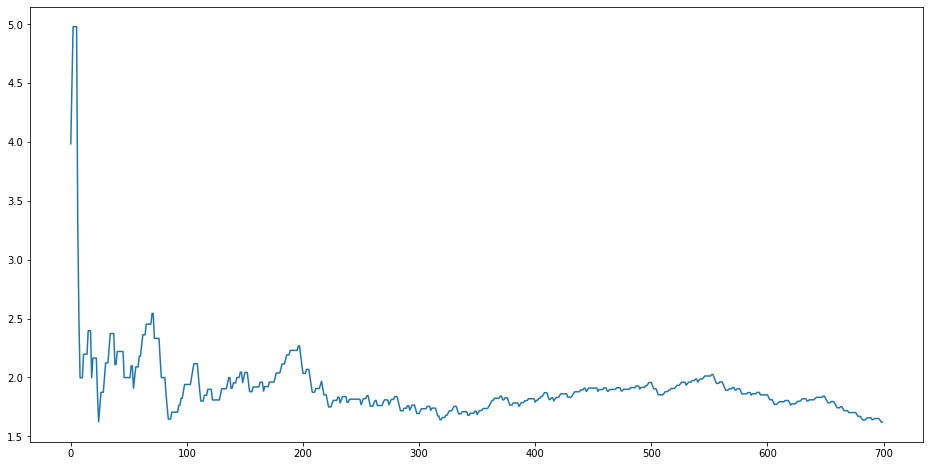

In [2]:
plt.figure(figsize=(16,8))
plt.plot(ratio[20:])
plt.show()

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


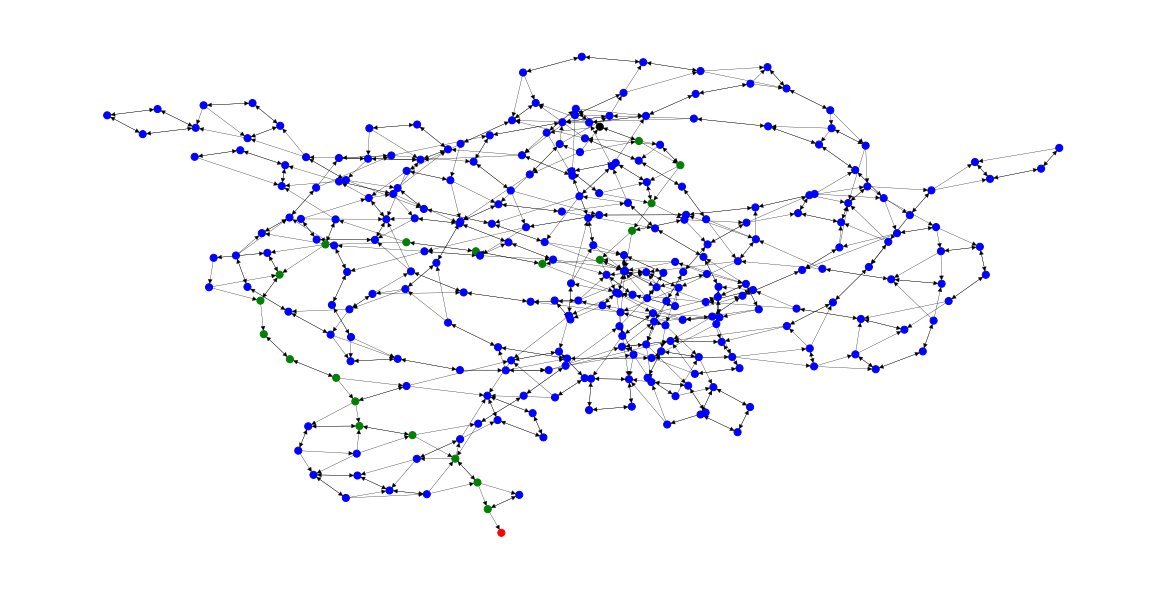

In [4]:
G = nx.DiGraph()
G.add_nodes_from(range(len(allstates)))

for i in range(len(allstateslinks)):
    for j in allstateslinks[i]:
        G.add_edge(i,j)
        
allstatesdict[str(solutionstate)]


plt.figure(figsize=(16,8))

node_color = []
for node in G:
    if node == allstatesdict[str(solutionstate)]:
        node_color.append('red')
    elif node == temp[0]: 
        node_color.append('black')
    elif node in list(temp):
        node_color.append('green')
    else:
        node_color.append('blue')

nx.draw_kamada_kawai(G, with_label = False, node_size = 50, node_color=node_color, font_size=0, arrowsize=10,  width=0.3)
#nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
plt.show()




In [25]:
nx.single_target_shortest_path(G, allstatesdict[str(solutionstate)])

{72: [72],
 50: [50, 72],
 34: [34, 50, 72],
 24: [24, 34, 50, 72],
 17: [17, 24, 34, 50, 72],
 10: [10, 17, 24, 34, 50, 72],
 16: [16, 17, 24, 34, 50, 72],
 5: [5, 10, 17, 24, 34, 50, 72],
 1: [1, 5, 10, 17, 24, 34, 50, 72],
 0: [0, 1, 5, 10, 17, 24, 34, 50, 72],
 2: [2, 1, 5, 10, 17, 24, 34, 50, 72]}

In [4]:
shortestpath

[53, 54, 11, 10, 15, 25, 38, 50, 39, 51, 59, 60, 75, 89, 96]

In [46]:
#FROM LONGEST SHORTEST PATH START TO SOLUTION LENGTH
n = 0
for i in temp:
    n=n+1
    Matrix = copy.deepcopy(OriginalMatrix)
    for j in allstates[i]:
        Matrix[j[0]][j[1]] = j[2]
        
    if(n==1):
        print([item for sublist in np.array(Matrix) for item in sublist])
        print("")
    
    print(np.array(Matrix))
    print("")

[4, 0, 2, 2, 3, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 1, 0, 0, 4, 0, 0]

[[4 0 2 2 3]
 [0 0 4 0 0]
 [0 4 4 0 0]
 [0 0 4 0 1]
 [0 0 4 0 0]]

[[4 2 2 3 0]
 [0 0 4 0 0]
 [0 4 4 0 0]
 [0 0 4 0 1]
 [0 0 4 0 0]]

[[4 0 2 0 0]
 [0 2 4 0 0]
 [0 4 4 0 0]
 [0 0 4 0 1]
 [0 0 4 3 0]]

[[4 2 0 0 0]
 [2 0 4 0 0]
 [0 4 4 0 0]
 [0 0 4 0 1]
 [0 0 4 3 0]]

[[4 0 0 0 0]
 [0 2 4 0 0]
 [0 4 4 0 0]
 [0 0 4 0 1]
 [2 0 4 3 0]]

[[4 0 0 0 0]
 [2 0 4 0 0]
 [0 4 4 0 0]
 [0 0 4 0 1]
 [2 0 4 3 0]]

[[4 0 0 3 0]
 [2 0 4 0 0]
 [2 4 4 0 0]
 [0 0 4 0 1]
 [0 0 4 0 0]]

[[4 3 0 0 0]
 [2 0 4 0 0]
 [2 4 4 0 0]
 [0 0 4 0 1]
 [0 0 4 0 0]]

[[4 0 0 0 0]
 [0 3 4 0 0]
 [0 4 4 0 0]
 [2 0 4 0 1]
 [2 0 4 0 0]]

[[4 0 0 0 0]
 [3 0 4 0 0]
 [0 4 4 0 0]
 [2 0 4 0 1]
 [2 0 4 0 0]]

[[4 0 0 0 0]
 [0 0 4 0 0]
 [3 4 4 0 0]
 [2 0 4 0 1]
 [2 0 4 0 0]]

[[4 0 0 0 0]
 [0 0 4 0 0]
 [3 4 4 0 0]
 [0 2 4 0 1]
 [0 2 4 0 0]]

[[4 0 0 0 0]
 [0 0 4 0 0]
 [0 4 4 0 0]
 [0 2 4 0 1]
 [3 2 4 0 0]]

[[4 0 0 0 0]
 [0 0 4 0 0]
 [0 4 4 0 0]
 [2 0 4 0 1]


In [137]:
temp = nx.single_target_shortest_path(G, allstatesdict[str(solutionstate)])
temp = temp[list(temp)[-1]]

#FROM LONGEST SHORTEST PATH START TO SOLUTION LENGTH
n = 0
for i in temp:
    n=n+1
    Matrix = copy.deepcopy(OriginalMatrix)
    for j in allstates[i]:
        Matrix[j[0]][j[1]] = j[2]
        
    if(n==1):
        print([item for sublist in np.array(Matrix) for item in sublist])
        print("")
    
    print(np.array(Matrix))
    print("")

#FROM BEGGINING STATE TO SOLUTION STATE
#for i in list(nx.shortest_path(G, source=0, target = allstatesdict[str(solutionstate)])):    
#    Matrix = copy.deepcopy(OriginalMatrix)
#    for j in allstates[i]:
#        Matrix[j[0]][j[1]] = j[2]
#        
#    if(i==0):
#        print([item for sublist in np.array(Matrix) for item in sublist])
#        print("")
#    
#    print(np.array(Matrix))
#    print("")


[0, 4, 0, 4, 4, 0, 2, 0, 4, 0, 2, 3, 3, 0, 0, 4, 0, 4, 0, 1, 0, 0, 0, 3, 3]

[[0 4 0 4 4]
 [0 2 0 4 0]
 [2 3 3 0 0]
 [4 0 4 0 1]
 [0 0 0 3 3]]

[[0 4 0 4 4]
 [0 0 0 4 0]
 [2 0 3 0 0]
 [4 2 4 0 1]
 [0 3 0 3 3]]

[[0 4 0 4 4]
 [0 0 0 4 0]
 [2 3 0 0 0]
 [4 2 4 0 1]
 [3 3 3 0 0]]

[[2 4 0 4 4]
 [0 3 0 4 0]
 [0 2 0 0 0]
 [4 3 4 0 1]
 [3 0 3 0 0]]

[[2 4 0 4 4]
 [0 0 3 4 0]
 [0 0 0 0 2]
 [4 3 4 0 1]
 [0 0 0 3 3]]

[[0 4 0 4 4]
 [0 0 0 4 0]
 [2 0 3 0 0]
 [4 0 4 0 1]
 [0 3 0 3 3]]

[[0 4 0 4 4]
 [0 0 0 4 0]
 [2 3 0 0 0]
 [4 0 4 0 1]
 [3 3 3 0 0]]

[[0 4 0 4 4]
 [0 0 0 4 0]
 [2 0 0 0 0]
 [4 3 4 0 1]
 [3 3 3 0 0]]

[[0 4 0 4 4]
 [0 0 0 4 0]
 [0 0 0 0 2]
 [4 3 4 0 1]
 [0 0 3 3 3]]

[[0 4 0 4 4]
 [0 0 0 4 0]
 [0 0 0 0 0]
 [4 0 4 0 1]
 [0 3 3 3 3]]



In [26]:
len(shortestpath)

10

In [1]:
#### Generate possible actions ####

import itertools
x= [1,2,3,4]
combinationstemp = [p for p in itertools.product(x, repeat=8)]

combinations = []
for i in range(0,len(combinationstemp)):
    if not any(i==j for i,j in zip(combinationstemp[i], combinationstemp[i][1:])):
        if not any(i==1 and j==2 and k==1 for i,j,k in zip(combinationstemp[i], combinationstemp[i][1:], combinationstemp[i][2:])):
            if not any(i==2 and j==1 and k==2 for i,j,k in zip(combinationstemp[i], combinationstemp[i][1:], combinationstemp[i][2:])):
                if not any(i==3 and j==4 and k==3 for i,j,k in zip(combinationstemp[i], combinationstemp[i][1:], combinationstemp[i][2:])):
                    if not any(i==4 and j==3 and k==4 for i,j,k in zip(combinationstemp[i], combinationstemp[i][1:], combinationstemp[i][2:])):
                        combinations.append(combinationstemp[i])

len(combinations)

4896

In [22]:
#### Define number of randomly generated objects ####        

nplayersmm = [2,2] #Number of exits too
nsupportmm = [0,4]
nwallsmm = [1,6]
npexistsmm = [1,1] 

import random
nplayers = random.randint(nplayersmm[0], nplayersmm[1])
nexits = random.randint(npexistsmm[0], npexistsmm[1])
nsupport = random.randint(nsupportmm[0], nsupportmm[1])
nwalls = random.randint(nwallsmm[0], nwallsmm[1])

#### GENERATE RANDOM MATRIX ####
import numpy as np
import math
import copy

solutions=0
triescounter = 0
while solutions!=1:
    triescounter +=1
    print("Number of attempts: " + str(triescounter), end="\r")
    
    solutions = 0
    vsol=[]
    


    # Generate puzzle board
    w, h = 5, 5; #board size

    available = list(range(0, w*h))
    Matrix = [[0 for x in range(w)] for y in range(h)] 

    #Choose random objects and place them on board
    exits = []
    for i in range(0,nexits):
        exits.append(random.choice(available))
        available.remove(exits[-1])
        Matrix[math.floor(exits[-1]/5)][exits[-1]%5] = 1
        exits[-1] = [math.floor(exits[-1]/5), exits[-1]%5, 3]

        
    players = []
    for i in range(0,nplayers):
        players.append(random.choice(available))
        available.remove(players[-1])
        Matrix[math.floor(players[-1]/5)][players[-1]%5] = 2
        players[-1] = [math.floor(players[-1]/5), players[-1]%5, 2]


    support = []
    for i in range(0,nsupport):
        support.append(random.choice(available))
        available.remove(support[-1])
        Matrix[math.floor(support[-1]/5)][support[-1]%5] = 3
        support[-1] = [math.floor(support[-1]/5), support[-1]%5, 3]


    walls = []
    for i in range(0,nwalls):
        walls.append(random.choice(available))
        available.remove(walls[-1])
        Matrix[math.floor(walls[-1]/5)][walls[-1]%5] = 4
        walls[-1] = [math.floor(walls[-1]/5), walls[-1]%5, 3]



    #print("Matrix to Solve:")

    OriginalMatrix = copy.deepcopy(Matrix)


    #### TRY SOLVE MATRIX #### 
    combinationsavailable = list(range(0, len(combinations)))

    solutions = 0

    playersnew = copy.deepcopy(players)
    supportnew = copy.deepcopy(support)

    #print("\nposition array: ")
    #print(allnew)

    for i in range(0, len(combinations)):

        #Choose random combination
        curcomb = random.choice(combinationsavailable)
        combinationsavailable.remove(curcomb)
        curcomb = combinations[curcomb]

        #Reset Matrix and positions
        Matrix = copy.deepcopy(OriginalMatrix)
        allnew = copy.deepcopy(playersnew+supportnew)
        playersin = 0 # Win condition
        supportin = 0 #fail condition
        
        vsol = []
        solutionfound = False

        #Check all combinations
        counter = 0
        for j in curcomb:
            vsol.append(copy.deepcopy(Matrix))
            
            #IF UP

            if j==1:
                temp = [el[0] for el in allnew]
                result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                for ps in result:
                    while allnew[ps][0]>0 and Matrix[allnew[ps][0]-1][allnew[ps][1]] in [0,1]:
                        if Matrix[allnew[ps][0]-1][allnew[ps][1]]==1:
                            if allnew[ps][2]==2:
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                playersin+=1
                                allnew[ps][2] = 0
                            else: 
                                Matrix[allnew[ps][0]-1][allnew[ps][1]]=0
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                allnew[ps][2] = 0
                                supportin += 1

                        if allnew[ps][2] == 2:
                            Matrix[allnew[ps][0]-1][allnew[ps][1]]=2
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        elif allnew[ps][2] == 3: 
                            Matrix[allnew[ps][0]-1][allnew[ps][1]]=3
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        allnew[ps][0] -= 1

            #IF DOWN

            if j==2:
                temp = [el[0] for el in allnew]
                result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse=True)]
                for ps in result:
                    while allnew[ps][0]<4 and Matrix[allnew[ps][0]+1][allnew[ps][1]] in [0,1]:
                        if Matrix[allnew[ps][0]+1][allnew[ps][1]]==1:
                            if allnew[ps][2]==2:
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                playersin+=1
                                allnew[ps][2] = 0
                            else: 
                                Matrix[allnew[ps][0]+1][allnew[ps][1]]=0
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                allnew[ps][2] = 0
                                supportin += 1

                        if allnew[ps][2] == 2:
                            Matrix[allnew[ps][0]+1][allnew[ps][1]]=2
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        elif allnew[ps][2] == 3:  
                            Matrix[allnew[ps][0]+1][allnew[ps][1]]=3
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        allnew[ps][0] += 1

            #IF LEFT

            if j==3:
                temp = [el[1] for el in allnew]
                result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1])]
                #print(result)
                for ps in result:
                    while allnew[ps][1]>0 and Matrix[allnew[ps][0]][allnew[ps][1]-1] in [0,1]:
                        if Matrix[allnew[ps][0]][allnew[ps][1]-1]==1:
                            if allnew[ps][2]==2:
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                playersin+=1
                                allnew[ps][2] = 0
                            else: 
                                Matrix[allnew[ps][0]][allnew[ps][1]-1]=0
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                allnew[ps][2] = 0
                                supportin += 1

                        if allnew[ps][2] == 2:
                            Matrix[allnew[ps][0]][allnew[ps][1]-1]=2
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        elif allnew[ps][2] == 3: 
                            Matrix[allnew[ps][0]][allnew[ps][1]-1]=3
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        allnew[ps][1] -= 1

            #IF RIGHT

            if j==4:
                temp = [el[1] for el in allnew]
                result = [x[0] for x in sorted(zip(range(0,len(temp)), temp ), key = lambda x: x[1], reverse = True)]
                for ps in result:
                    while allnew[ps][1]<4 and Matrix[allnew[ps][0]][allnew[ps][1]+1] in [0,1]:
                        if Matrix[allnew[ps][0]][allnew[ps][1]+1]==1:
                            if allnew[ps][2]==2:
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                playersin+=1
                                allnew[ps][2] = 0
                            elif allnew[ps][2]==3: 
                                Matrix[allnew[ps][0]][allnew[ps][1]+1]=0
                                Matrix[allnew[ps][0]][allnew[ps][1]]=0
                                allnew[ps][2] = 0
                                supportin += 1

                        if allnew[ps][2] == 2:
                            Matrix[allnew[ps][0]][allnew[ps][1]+1]=2
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        elif allnew[ps][2] == 3: 
                            Matrix[allnew[ps][0]][allnew[ps][1]+1]=3
                            Matrix[allnew[ps][0]][allnew[ps][1]]=0
                        allnew[ps][1] += 1 
            
            counter += 1
            if playersin == 1 and len(players)==2 and counter<5:
                supportin+=1
            
            if supportin == 0 and playersin == len(players): 
                if solutions == 0:
                    solution = curcomb[0:counter]
                    vsolfinal = vsol
                    solutionfound = True
                    solutions+=1
                if not solutionfound:
                    solutions+=1
            
        #print(Matrix)

vsolfinal.append(copy.deepcopy(Matrix))
print(np.array(OriginalMatrix))


print("\n")
for i in solution:
    if i==1: print("up")
    if i==2: print("down")
    if i==3: print("left")
    if i==4: print("right")

[[0 0 0 0 0]tempts: 20
 [0 1 2 0 0]
 [0 0 0 3 0]
 [0 0 2 0 0]
 [0 4 0 0 0]]


right
down
left
down
right
up
left
down


In [14]:
solution

(4, 1, 4, 1, 3, 2, 4, 1)

In [247]:
solution

(2, 4, 1, 3, 2, 3, 1, 3)

In [30]:
import itertools
x= [0,1,2,3,4]
combinationstemp = [p for p in itertools.product(x, repeat=12)]

combinations = []
for i in range(0,len(combinationstemp)):
    if combinationstemp[i].count(1)==1 and combinationstemp[i].count(2) in [1,2,3] and combinationstemp[i].count(0)>4:
        combinations.append(combinationstemp[i])

In [15]:
import itertools
x= [0,1,2,3,4]
combinationstemp = [p for p in itertools.product(x, repeat=12) if (p.count(1)==1 and p.count(2) in [1,2,3] and p.count(3) in [0,1,2,3,4] and p.count(4) in [0,1,2,3,4,5] and p.count(0)>7)]

In [13]:
len(combinationstemp)

41052